In [2]:
import numpy as np
import matplotlib.pyplot as plt 

In [26]:
# Define coil parameters                                                                                                                                
inch = 0.0254
r = 1.56 * inch # Bore diameter of coils, in meter                                                                                                      
u0 = 1.256637e-6 # Magnetic constant                                                                                                                    
space = 0.79 * 2 * inch # Center to Center dist. in meters                                                                                              
WireDia = 0.405e-3 # Wire diameter                                                                                                                      
pos_back = -space/2 # Define the position of back coil center                                                                                           
pos_front = space/2 # Define the position of front coil center                                                                                          
I = 1000 # Current in Coils, Amps                                                                                                                       
def Magfield(pos,z,R,I):
    Magfield = u0*I*R**2/2/(((z-pos)**2+R**2)**(3/2))
    return Magfield

## 9x9 Helmholtz Coil

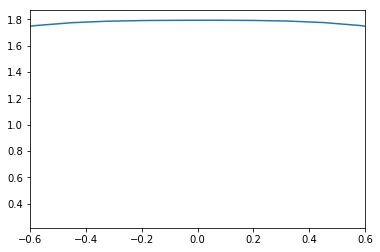

In [33]:
winding = 9
r = 1.56 * inch # Bore diameter of coils, in meter                                                                                                                                                                                                                       
space = 0.79* 2 * inch # Center to Center dist. in meters                                                                                                                                                                                                                 
pos_back = -space/2 # Define the position of back coil center                                                                                           
pos_front = space/2 # Define the position of front coil center                                                                                          
I = 1000# Current in Coils, Amps      
z = np.linspace(-2*space, 2*space, 50)
B1 = np.zeros(len(z))
for i in range(0, winding): # Columns
    pos = pos_back - np.floor(winding / 2)* WireDia + i * WireDia
    for j in range(0, winding):
        R = r + i * WireDia
        B1 = B1 + Magfield(pos, z, R, I)
for i in range(0, winding): # Columns
    pos = pos_front - np.floor(winding / 2)* WireDia + i * WireDia
    for j in range(0, winding):
        R = r + i * WireDia
        B1 = B1 + Magfield(pos, z, R, I)
dir_B1 = (B1[1:] - B1[:-1]) / (z[1:] - z[:-1]) 
plt.figure(2)
plt.plot(z/inch, B1)
plt.xlim([-0.6,0.6])
plt.show()
        

## 12 x 12 Anti-Helmholtz Coil

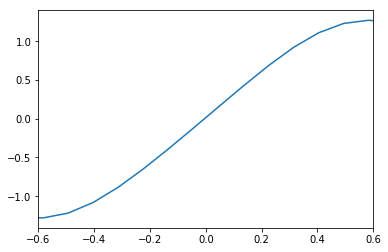

In [32]:
winding = 12
r = 0.62 * inch # Bore diameter of coils, in meter                                                                                                                                                                                                                       
space = 0.55 * 2 * inch # Center to Center dist. in meters                                                                                                                                                                                                                 
pos_back = -space/2 # Define the position of back coil center                                                                                           
pos_front = space/2 # Define the position of front coil center                                                                                          
I = 300# Current in Coils, Amps
z = np.linspace(-2*space, 2*space, 50)
B2 = np.zeros(len(z))
for i in range(0, winding): # Columns
    pos = pos_back - np.floor(winding / 2)* WireDia + WireDia / 2 + i * WireDia
    for j in range(0, winding): # Layers
        R = r + i * WireDia
        B2 = B2 + Magfield(pos, z, R, -I)
for i in range(0, winding): #
    pos = pos_front - np.floor(winding / 2)* WireDia + + WireDia /2 + i * WireDia
    for j in range(0, winding):
        R = r + i * WireDia
        B2 = B2 + Magfield(pos, z, R, I)
dir_B2 = (B2[1:] - B2[:-1]) / (z[1:] - z[:-1])         
plt.figure(2)
plt.plot(z/inch, B2)
plt.xlim([-0.6,0.6])
plt.show()

## Combined Plot

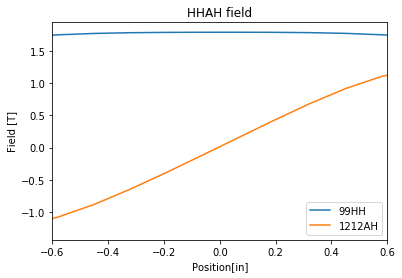

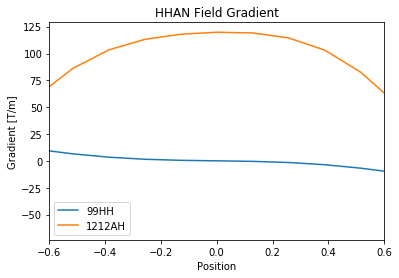

In [40]:
plt.figure(3)
plt.plot(z/inch, B1, label='99HH')
plt.plot(z/inch, B2, label='1212AH')
plt.title('HHAH field')
plt.xlim([-0.6,0.6])
plt.xlabel('Position[in]')
plt.ylabel('Field [T]')
plt.legend()
plt.show()

plt.figure(4)
plt.plot(z[:-1]/inch + (z[1] -z[0])/2/inch, dir_B1, label='99HH')
plt.plot(z[:-1]/inch + (z[1] -z[0])/2/inch, dir_B2, label='1212AH')
plt.title('HHAN Field Gradient')
plt.xlabel('Position')
plt.ylabel('Gradient [T/m]')
plt.xlim([-0.6, 0.6])
plt.legend()
plt.show()
